## Import modules and functions

In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio

## Define directory of images

In [2]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed culture/Controls/201912_tnrs_arent_preexisting_epitopes' #master folder

## Make dictionary for storing results

In [3]:
results = {"filename":[],"exp":[],"coverslip":[],
           "Manual mask from matlab GUI":[],"bg sub int under mask":[]}
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if "analyse" in str(filelist[i]):
        if ("ignore" in str(filelist[i]))==False:
            if filelist[i].endswith(".nd2"): 
                results["filename"].append(filelist[i])
                results["coverslip"].append(filelist[i].split('/')[-2])
                results["exp"].append(filelist[i].split('/')[-4])

## Read manual masks from Matlab GUI

In [4]:
## matlab files
for im in range(0,len(results["filename"])): 
    file=results["filename"][im][:-4]+'_dendritesmask.mat'
    from pathlib import Path
    my_file = Path(file)
    if my_file.exists():
        print(file)
        mat = spio.loadmat(file, squeeze_me=True)
        mask=mat['totMask']>0.99
        results["Manual mask from matlab GUI"].append(mask)
    else:
        results["Manual mask from matlab GUI"].append(np.nan)
clear_output()        
print("Done!")

Done!


## Batch analysis of images - mean intensity

In [5]:
print('Total number of images: ' + str(len(results['filename'])))

for i in range(0,len(results["filename"])): 
    flag=False
    print('Calculating image no ' + str(i+1) + ' out of' + str(len(results["filename"])))
    #read the image
    with ND2Reader(results["filename"][i]) as images:
        ecm_image=images[0]
    #convert to numpy array - a format easier to manipunuclei with code
    ecm_image=ecm_image.astype(np.int16)
    #read masks 
    matlab_mask=results["Manual mask from matlab GUI"][i]
    if type(matlab_mask)==np.ndarray:
        flag=True
    #image after background subtraction
    #for ecm image
    if flag==True:
        ecm_matlabmasked_bgreduced=deepcopy(ecm_image)
        bg_matlabmask=np.mean(ndi.median_filter(ecm_image[matlab_mask],size=5))+0*np.std(ndi.median_filter(ecm_image[matlab_mask],size=5))
        ecm_matlabmasked_bgreduced=np.subtract(ecm_matlabmasked_bgreduced,bg_matlabmask)
        ecm_matlabmasked_bgreduced[ecm_matlabmasked_bgreduced<0]=0
        ecm_matlabmasked_bgreduced[~matlab_mask]=0
        
    if flag==True:
        results["bg sub int under mask"].append(ecm_matlabmasked_bgreduced[matlab_mask].mean())
    else:
        results["bg sub int under mask"].append(np.nan)

Total number of images: 508
Calculating image no 1 out of508
Calculating image no 2 out of508
Calculating image no 3 out of508
Calculating image no 4 out of508
Calculating image no 5 out of508
Calculating image no 6 out of508
Calculating image no 7 out of508
Calculating image no 8 out of508
Calculating image no 9 out of508
Calculating image no 10 out of508
Calculating image no 11 out of508
Calculating image no 12 out of508
Calculating image no 13 out of508
Calculating image no 14 out of508
Calculating image no 15 out of508
Calculating image no 16 out of508
Calculating image no 17 out of508
Calculating image no 18 out of508
Calculating image no 19 out of508
Calculating image no 20 out of508
Calculating image no 21 out of508
Calculating image no 22 out of508
Calculating image no 23 out of508
Calculating image no 24 out of508
Calculating image no 25 out of508
Calculating image no 26 out of508
Calculating image no 27 out of508
Calculating image no 28 out of508
Calculating image no 29 out o

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountere

Calculating image no 194 out of508
Calculating image no 195 out of508
Calculating image no 196 out of508
Calculating image no 197 out of508
Calculating image no 198 out of508
Calculating image no 199 out of508
Calculating image no 200 out of508
Calculating image no 201 out of508
Calculating image no 202 out of508
Calculating image no 203 out of508
Calculating image no 204 out of508
Calculating image no 205 out of508
Calculating image no 206 out of508
Calculating image no 207 out of508
Calculating image no 208 out of508
Calculating image no 209 out of508
Calculating image no 210 out of508
Calculating image no 211 out of508
Calculating image no 212 out of508
Calculating image no 213 out of508
Calculating image no 214 out of508
Calculating image no 215 out of508
Calculating image no 216 out of508
Calculating image no 217 out of508
Calculating image no 218 out of508
Calculating image no 219 out of508
Calculating image no 220 out of508
Calculating image no 221 out of508
Calculating image no

Calculating image no 429 out of508
Calculating image no 430 out of508
Calculating image no 431 out of508
Calculating image no 432 out of508
Calculating image no 433 out of508
Calculating image no 434 out of508
Calculating image no 435 out of508
Calculating image no 436 out of508
Calculating image no 437 out of508
Calculating image no 438 out of508
Calculating image no 439 out of508
Calculating image no 440 out of508
Calculating image no 441 out of508
Calculating image no 442 out of508
Calculating image no 443 out of508
Calculating image no 444 out of508
Calculating image no 445 out of508
Calculating image no 446 out of508
Calculating image no 447 out of508
Calculating image no 448 out of508
Calculating image no 449 out of508
Calculating image no 450 out of508
Calculating image no 451 out of508
Calculating image no 452 out of508
Calculating image no 453 out of508
Calculating image no 454 out of508
Calculating image no 455 out of508
Calculating image no 456 out of508
Calculating image no

## Make a dataframe of the results

In [6]:
df=pd.DataFrame(results)
df2=deepcopy(df)
df2['Blocked or not']='None'
df2.loc[df2['filename'].str.contains('blocked'), 'Blocked or not'] = 'Blocked'
df2.loc[df2['filename'].str.contains('noblocking'), 'Blocked or not'] = 'Unblocked'
df2.loc[df2['filename'].str.contains('nblocked'), 'Blocked or not'] = 'Unblocked'
df2.loc[df2['filename'].str.contains('atto'), 'Blocked or not'] = 'Atto647@mouse'
df2.loc[(df2['filename'].str.contains('unblocked'))&(df2['filename'].str.contains('ctrl'))
        , 'Blocked or not'] = 'No Blocking'

df2['Condition']='None'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('gm6001_1to100'))
        , 'Condition'] = 'GM6001'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('gm60011to100'))
        , 'Condition'] = 'GM6001'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('dmso_1to100'))
        , 'Condition'] = 'DMSO'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('dmso1to100'))
        , 'Condition'] = 'DMSO'
df2.loc[(df2['filename'].str.contains('post_fixing'))&(df2['filename'].str.contains('post_fixing'))
        , 'Condition'] = 'PFA fixed'
df2.loc[(df2['filename'].str.contains('live_chabc'))&(df2['filename'].str.contains('treated'))
        , 'Condition'] = 'chABC'
df2.loc[(df2['filename'].str.contains('live_chabc'))&(df2['filename'].str.contains('ctrl'))
        , 'Condition'] = 'chABC - ctrl'
df2.loc[(df2['filename'].str.contains('20191211_chabc'))&(df2['filename'].str.contains('treated'))
        , 'Condition'] = 'chABC - treated'
df2.loc[(df2['filename'].str.contains('methanol'))&(df2['filename'].str.contains('methanol'))
        , 'Condition'] = 'Methanol fixed'
df2.loc[(df2['filename'].str.contains('pfa'))&(df2['filename'].str.contains('pfa'))
        , 'Condition'] = 'PFA fixed'
df2.loc[(df2['filename'].str.contains('atto'))
        , 'Condition'] = 'Atto647@mouse'
df2.loc[(df2['filename'].str.contains('noblocking'))&(df2['filename'].str.contains('post_fixing'))
        , 'Condition'] = 'No Blocking'
df2.loc[(df2['filename'].str.contains('unblocked'))&(df2['filename'].str.contains('ctrl'))
        , 'Condition'] = 'No Blocking'



df2['Exp']='None'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('20191205'))
        , 'Exp'] = 'GM6001 20191205'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('20191203'))
        , 'Exp'] = 'GM6001 20191203'
df2.loc[(df2['filename'].str.contains('20191205_chabc'))&(df2['filename'].str.contains('live_chabc'))
        , 'Exp'] = 'chABC 20191205'
df2.loc[(df2['filename'].str.contains('20191212'))&(df2['filename'].str.contains('chabc'))
        , 'Exp'] = 'chABC 20191212'
df2.loc[(df2['filename'].str.contains('20191212'))&(df2['filename'].str.contains('methanol'))
        , 'Exp'] = 'methanol 20191212'
df2.loc[(df2['filename'].str.contains('20191212'))&(df2['filename'].str.contains('pfa'))
        , 'Exp'] = 'pfa 20191212'
df2.loc[(df2['filename'].str.contains('20191203'))&(df2['filename'].str.contains('post_fixing'))
        , 'Exp'] = 'pfa 20191203'
df2.loc[(df2['filename'].str.contains('20191223'))&(df2['filename'].str.contains('pfa'))
        , 'Exp'] = 'pfa 20191223'
df2.loc[(df2['filename'].str.contains('20191223'))&(df2['filename'].str.contains('methanol'))
        , 'Exp'] = 'methanol 20191223'

In [7]:
expnam=[]
medi=[]
for exp in df2["Exp"].unique():
    dfexp=df2[df2["Exp"]==exp]
    med=dfexp["bg sub int under mask"].median()
    expnam.append(exp)
    medi.append(med)
df2["bg sub int under mask norm2med"]=np.nan
for i in range(0,len(df2)):
    for j in range(0,len(expnam)):
        if df2["Exp"][i]==expnam[j]:
            df2["bg sub int under mask norm2med"][i]=df2["bg sub int under mask"][i]/medi[j]

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


## ttests

In [20]:
df_pic=df2[df2["Blocked or not"]!="Unblocked"]
df_dmso=df_pic[df_pic["Condition"]=="DMSO"][var]
df_gm6001=df_pic[df_pic["Condition"]=="GM6001"][var]
df_atto=df_pic[df_pic["Condition"]=='Atto647@mouse'][var]
df_pfa=df_pic[df_pic["Condition"]=='PFA fixed'][var]
df_meth=df_pic[df_pic["Condition"]=='Methanol fixed'][var]
df_chabc=df_pic[df_pic["Condition"]=='chABC'][var]
df_ubcontrol=df_pic[df_pic["Condition"]=="No Blocking"][var]

[stat, pvalpfa]=stats.ttest_ind(df_atto,df_pfa)
[stat, pvalmeth]=stats.ttest_ind(df_atto,df_meth)
[stat, pvalchabc]=stats.ttest_ind(df_atto,df_chabc)

print('pfa: '+str(pvalpfa*3))
print('meth: '+str(pvalmeth*3))
print('chabc: '+str(pvalchabc*3))

pfa: 0.12766211463917154
meth: 1.9841751451363194
chabc: 1.3207603464255452e-06


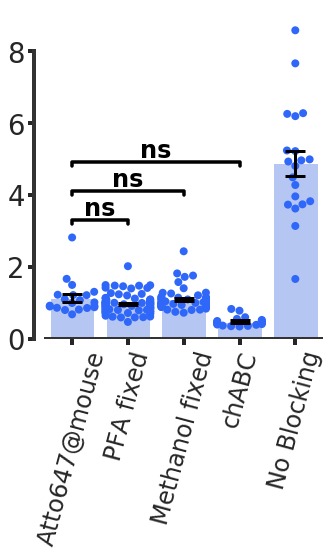

In [14]:
sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker

fig=plt.figure(figsize=(5,6))
df2plot=df2[df2["Blocked or not"]!="Unblocked"]
var="bg sub int under mask norm2med"
#var="ecm mean int norm2med"

order=['Atto647@mouse',
       'PFA fixed','Methanol fixed','chABC','No Blocking'
       ]

'''paletteswarm ={"Background - Autofluorescence":"#2F67F8",
               "Unblocked TNR647":"#333333",
               "Background - Atto647":"#2F67F8",
               "Block+0, TNR647":"#2F67F8",
               "Block+12, TNR647":"#2F67F8"}
palette ={"Background - Autofluorescence":"#abc2fc",
          "Unblocked TNR647":"#adadad",
               "Background - Atto647":"#abc2fc",
               "Block+0, TNR647":"#abc2fc",
               "Block+12, TNR647":"#abc2fc"}'''


g=sns.barplot(data=df2plot,y=var,x="Condition",
            order=order,color="#abc2fc",ci=None)

g=sns.swarmplot(data=df2plot,y=var,x="Condition",
            order=order,color="#2F67F8",size=8)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(g, .8)

plt.errorbar(x=np.arange(0,len(order)),
             y=[df2plot[df2plot["Condition"]==condtype][var].mean() for condtype in order],
             yerr=[df2plot[df2plot["Condition"]==condtype][var].sem() for condtype in order],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,
             capthick=3,zorder=10,
            alpha=1)

plt.axhline(0, color='#333333',alpha=1,linewidth=4)

g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)

plt.rcParams['font.sans-serif'] = 'Helvetica'


g.set_ylabel('')
g.set_xlabel('',color='#333333',alpha=.7)


g.grid(False)


for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)

plt.xticks(g.get_xticks(),order,
           rotation=75,size=24)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=True,trim=trims,offset=offsets)
#plt.yticks([0,2,4,6,8,10,12],fontsize=22,color='#333333')


scale_x=1
ticks_y=ticker.FuncFormatter(lambda x, pos: '{0:g}' .format(x/scale_x))
g=plt.gca()
g.yaxis.set_major_formatter(ticks_y)

#plt.ylim([0,12.5])
x1, x2 = 0,1
y= 3.2
h=0.1
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col,size=24, weight='bold')

x1, x2 = 2,0
y= 4
h=0.1
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col,size=24, weight='bold')

x1, x2 = 3,0
y= 4.8
h=0.1
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col,size=24, weight='bold')


diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"

fig.savefig(diri+'supp_ctrl_notpreexistingepitopes_.svg', bbox_inches='tight', format='svg')

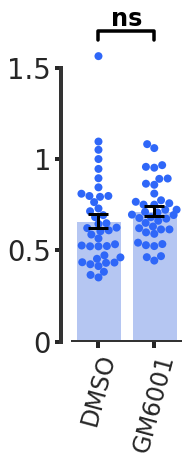

In [9]:
sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker

fig=plt.figure(figsize=(2,6))
df2plot=df2[df2["Blocked or not"]!="Unblocked"]
var="bg sub int under mask norm2med"
#var="ecm mean int norm2med"

order=['DMSO',
       'GM6001'
       ]

'''paletteswarm ={"Background - Autofluorescence":"#2F67F8",
               "Unblocked TNR647":"#333333",
               "Background - Atto647":"#2F67F8",
               "Block+0, TNR647":"#2F67F8",
               "Block+12, TNR647":"#2F67F8"}
palette ={"Background - Autofluorescence":"#abc2fc",
          "Unblocked TNR647":"#adadad",
               "Background - Atto647":"#abc2fc",
               "Block+0, TNR647":"#abc2fc",
               "Block+12, TNR647":"#abc2fc"}'''


g=sns.barplot(data=df2plot,y=var,x="Condition",
            order=order,color="#abc2fc",ci=None)

g=sns.swarmplot(data=df2plot,y=var,x="Condition",
            order=order,color="#2F67F8",size=8)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(g, .8)

plt.errorbar(x=np.arange(0,len(order)),
             y=[df2plot[df2plot["Condition"]==condtype][var].mean() for condtype in order],
             yerr=[df2plot[df2plot["Condition"]==condtype][var].sem() for condtype in order],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,
             capthick=3,zorder=10,
            alpha=1)

plt.axhline(0, color='#333333',alpha=1,linewidth=4)

g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)

plt.rcParams['font.sans-serif'] = 'Helvetica'


g.set_ylabel('')
g.set_xlabel('',color='#333333',alpha=.7)


g.grid(False)


for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)

plt.xticks(g.get_xticks(),order,
           rotation=75,size=24)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=True,trim=trims,offset=offsets)
#plt.yticks([0,2,4,6,8,10,12],fontsize=22,color='#333333')


scale_x=1
ticks_y=ticker.FuncFormatter(lambda x, pos: '{0:g}' .format(x/scale_x))
g=plt.gca()
g.yaxis.set_major_formatter(ticks_y)

#plt.ylim([0,12.5])
x1, x2 = 0,1
y= 1.65
h=0.05
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col,size=24, weight='bold')



diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"

fig.savefig(diri+'supp_ctrl_notpreexistingepitopes_gm6001.svg', bbox_inches='tight', format='svg')

## Number of images in each condition

In [18]:
for condition in df2plot["Condition"].unique():
    print(condition+' ' + str(len(df2plot[df2plot["Condition"]==condition])))

DMSO 40
None 60
GM6001 40
PFA fixed 74
chABC - ctrl 20
chABC 20
No Blocking 20
Methanol fixed 50
Atto647@mouse 20


## find representative pics

In [16]:
len(df_dmso)

40

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


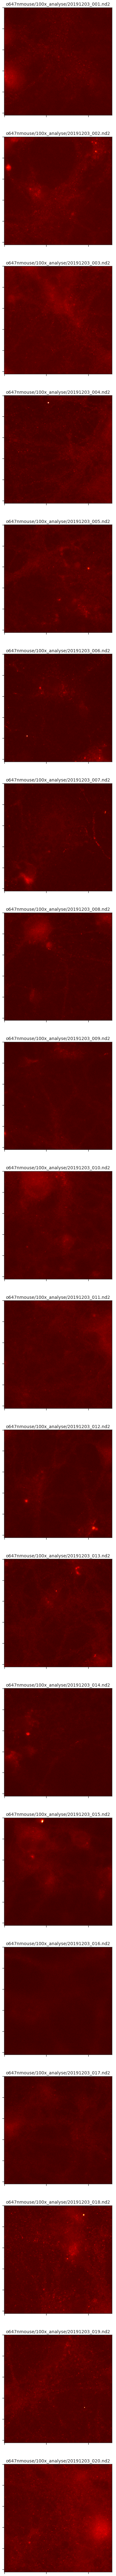

In [15]:

df_pic=df2[df2["Blocked or not"]!="Unblocked"]
df_dmso=df_pic[df_pic["Condition"]=="DMSO"]
df_gm6001=df_pic[df_pic["Condition"]=="GM6001"]
df_atto=df_pic[df_pic["Condition"]=='Atto647@mouse']
df_pfa=df_pic[df_pic["Condition"]=='PFA fixed']
df_meth=df_pic[df_pic["Condition"]=='Methanol fixed']
df_chabc=df_pic[df_pic["Condition"]=='chABC']
df_ubcontrol=df_pic[df_pic["Condition"]=="No Blocking"]

df_2show=df_atto
df_2show=df_2show.reset_index()

minval=0
maxval=10000
num=1
leng=len(df_2show)
fig=plt.figure(figsize=(20,150))
for i in range(0,len(df_2show)):
    #print(i)
    fig.add_subplot(leng,1,num)
    with ND2Reader(df_2show["filename"][i]) as images:
        ecm_image=images[0]
        plt.imshow(ecm_image,interpolation='none',cmap='hot',vmin=minval,vmax=maxval)
        plt.title(df_2show["filename"][i][-40:], size=14)
        plt.yticks(visible=False)
        plt.xticks(visible=False)
        plt.grid(visible=False)
        plt.axis(visible=False)
        #scalebar = ScaleBar(107.1, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
        #                       font_properties={'size':0,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
        #plt.gca().add_artist(scalebar)
        num+=1
    